<a href="https://colab.research.google.com/github/caqq07/ZAXAZCXCACAXCAXCA/blob/main/ImageGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q invisible_watermark transformers accelerate safetensors diffusers controlnet_aux==0.0.7 xformers mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/

# Inference with pipelines
- For base SDXL

In [ ]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, DiffusionPipeline, KDPM2AncestralDiscreteScheduler, StableDiffusionXLPipeline, AutoencoderKL
import gc
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:

from diffusers import StableDiffusionXLPipeline
import torch

model_base = "femboysLover/blue_pencil-fp16-XL"
v_autoencoder = "madebyollin/sdxl-vae-fp16-fix"

vae = AutoencoderKL.from_pretrained(v_autoencoder, torch_dtype=torch.float16)


pipe = StableDiffusionXLPipeline.from_pretrained(
    model_base,
    torch_dtype=torch.float16,
    vae=vae,
    add_watermarker=False, # no watermarker
    )

pipe.safety_checker = None

pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "femboysLover/blue_pencil-fp16-XL",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

- Refiner of SDXL.

In [ ]:
model_refiner = "stabilityai/stable-diffusion-xl-refiner-1.0"

pipe_refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    model_refiner,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    add_watermarker=False, # no watermarker
    )

#pipe_refiner.to("cuda")
pipe_refiner.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = "(((hdr, masterpiece, highest resolution, best quality, beautiful, raw image))), (((extremely detailed, rendered))), female russian, white, ((age 25)), with Red hair, long face,  naked boobs,, ass view behind shot, Hair Style: curly, long, blue, maid outfit, In Istanbul, ((full body))"
prompt2 = "(((hdr, masterpiece, highest resolution, best quality, beautiful, raw image))), (((extremely detailed, rendered))), female russian, white, ((age 25)), with Red hair, long face,  naked boobs,, ass view behind shot, Hair Style: curly, long, blue, maid outfit, In Istanbul, naked boobs, ((full body))"
negative_prompt = "longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality"
negative_prompt2 = "longbody, lowres, bad anatomy, bad hands, missing fingers, pubic hair,extra digit, fewer digits, cropped, worst quality, low quality"

image_base_latent = pipe(
    prompt=prompt,
    prompt_2=prompt2,
    negative_prompt=negative_prompt,
    negative_prompt_2=negative_prompt2,
    guidance_scale=7.0,
    height=1344,
    width=768,
    num_inference_steps=25,
    output_type="latent",
    denoising_end=0.8 # Cut the base denoising in 80%
    ).images[0]
print(image_base_latent.shape)

gc.collect()
torch.cuda.empty_cache()

image_refiner = pipe_refiner(
    prompt=prompt,
    prompt_2=prompt2,
    negative_prompt=negative_prompt,
    negative_prompt_2=negative_prompt2,
    image=image_base_latent,
    num_inference_steps=25,
    height=1344,
    width=768,
    strength=0.3,
    denoising_start=0.8
    ).images[0]

gc.collect()
torch.cuda.empty_cache()

  0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([4, 168, 96])


  0%|          | 0/5 [00:00<?, ?it/s]

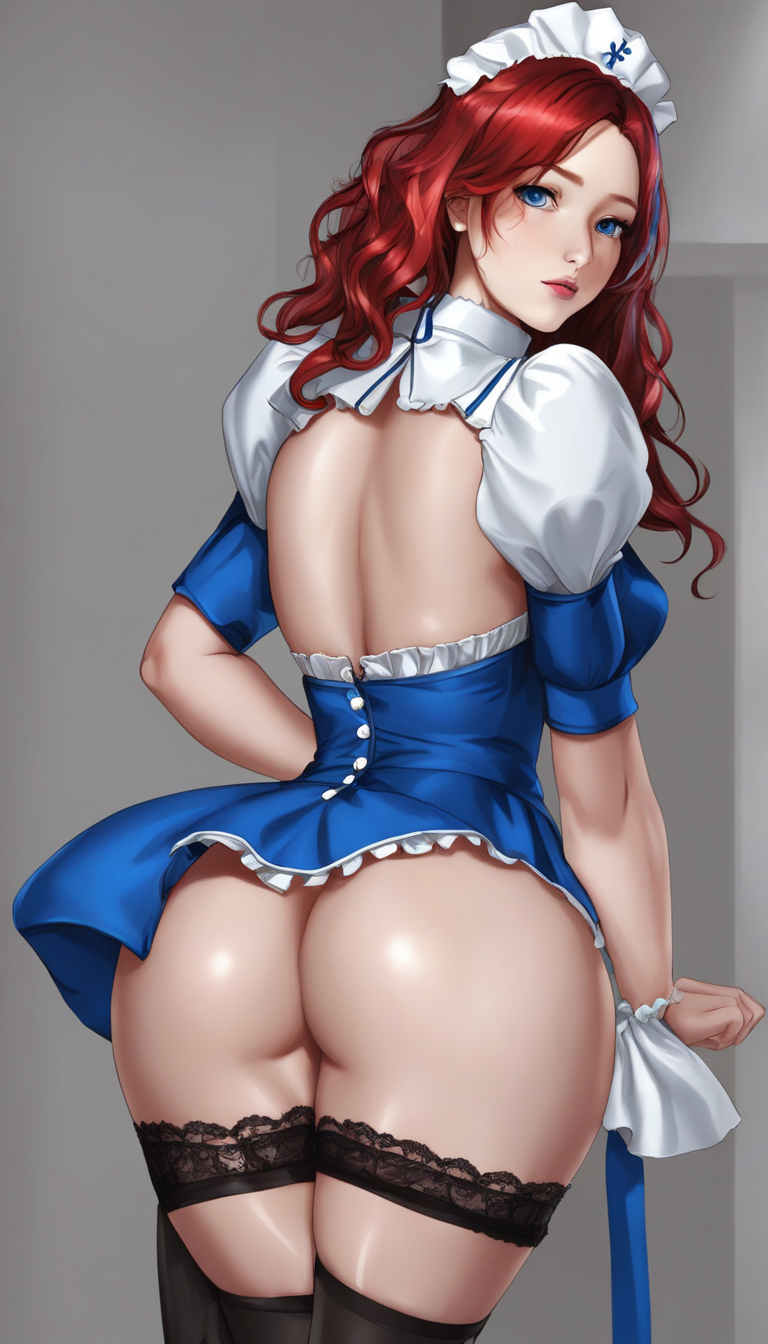

In [ ]:
image_refiner